In [20]:
import numpy as np
import matplotlib.pyplot as plt

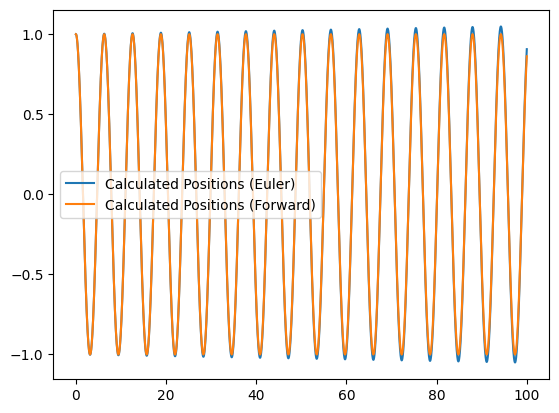

In [21]:
def derivatives(p, v):
    """ this function is specific to the problem """
    return (v, -p)

def forward_euler(p0, v0, iterations, step):
    positions = np.zeros(iterations + 1, dtype=float)
    positions[0] = p0
    velocities = np.zeros(iterations + 1, dtype=float)
    velocities[0] = v0


    for i in range(iterations):
        # compute the derivatives
        dpdt, dvdt = derivatives(positions[i], velocities[i])

        # compute the next velocity
        velocities[i + 1] = velocities[i] + step * dvdt
        positions[i + 1] = positions[i] + step * dpdt

    return positions, velocities


def midpoint_methid(p0, v0, iterations, step):
    positions = np.zeros(iterations + 1, dtype=float)
    positions[0] = p0
    velocities = np.zeros(iterations + 1, dtype=float)
    velocities[0] = v0
    accelerations = np.zeros(iterations + 1, dtype=float)

    for i in range(iterations):
        #compute the derivatives
        dpdt, dvdt = derivatives(positions[i], velocities[i])

        # create the half step
        velocity_n_plus_half = velocities[i] + 0.5 * step * dvdt
        position_n_plus_half = positions[i] + 0.5 * step * dpdt

        # compute the derivatives again
        dpdt, dvdt = derivatives(position_n_plus_half, velocity_n_plus_half)
        velocities[i + 1] = velocities[i] + step * dvdt
        positions[i + 1] = positions[i] + step * dpdt

    return positions, velocities


p0 = 1
v0 = 0

iterations = 100000
total_time = 100
euler_positions, euler_velocites = forward_euler(p0, v0, iterations, total_time / iterations)
forward_positions, forward_velocites = midpoint_methid(p0, v0, iterations, total_time / iterations)


time_steps = np.linspace(0, total_time, iterations + 1)
plt.plot(time_steps, euler_positions, label='Calculated Positions (Euler)')
#plt.plot(time_steps, euler_velocites, label='Calculated Velocities (Euler)')
plt.plot(time_steps, forward_positions, label='Calculated Positions (Forward)')
#plt.plot(time_steps, forward_velocites, label='Calculated Velocities (Forward)')
plt.legend()

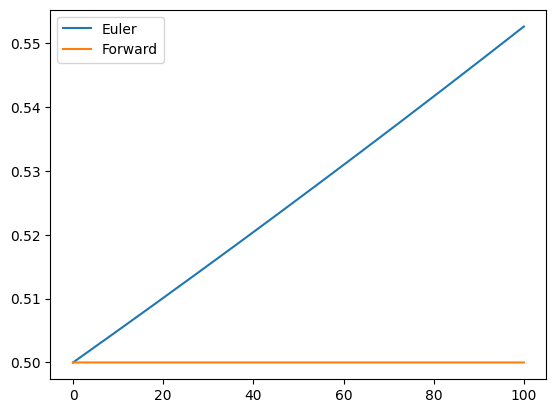

In [22]:
## Computing the total energy for each of the time step
def total_energy(position, velocity, m=1, k=1):
    return 0.5 * m * np.abs(velocity)**2 + 0.5 * k * np.abs(position)**2

euler_total_energies = np.zeros_like(euler_positions)
forward_total_energies = np.zeros_like(euler_positions)
for i in range(len(euler_positions)):
    euler_total_energies[i] = total_energy(euler_positions[i], euler_velocites[i])
    forward_total_energies[i] = total_energy(forward_positions[i], forward_velocites[i])

plt.plot(time_steps, euler_total_energies, label='Euler')
plt.plot(time_steps, forward_total_energies, label='Forward')
plt.legend()

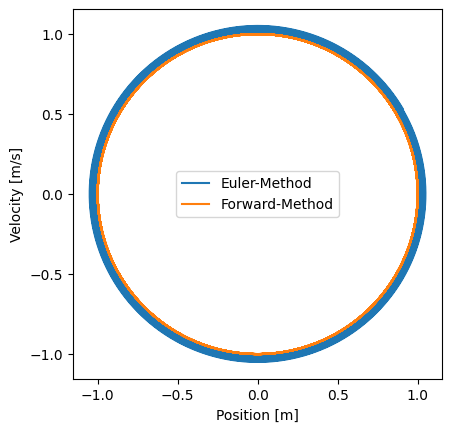

In [23]:
plt.plot(euler_positions, euler_velocites, label='Euler-Method')
plt.plot(forward_positions, forward_velocites, label='Forward-Method')

plt.gca().set_aspect('equal')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.show()